In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
continuous = [var for var in df.columns if df[var].dtype!='O']
categorical = [var for var in df.columns if df[var].dtype=='O']

print("Continuous List: ", continuous, "\nCount: ", len(continuous))
print("Categorical List: ", categorical, "\nCount: ", len(categorical))

Continuous List:  ['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 
Count:  16
Categorical List:  ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 
Count:  10


## Linearity Analysis between price and other variable to check assumption satisfcation

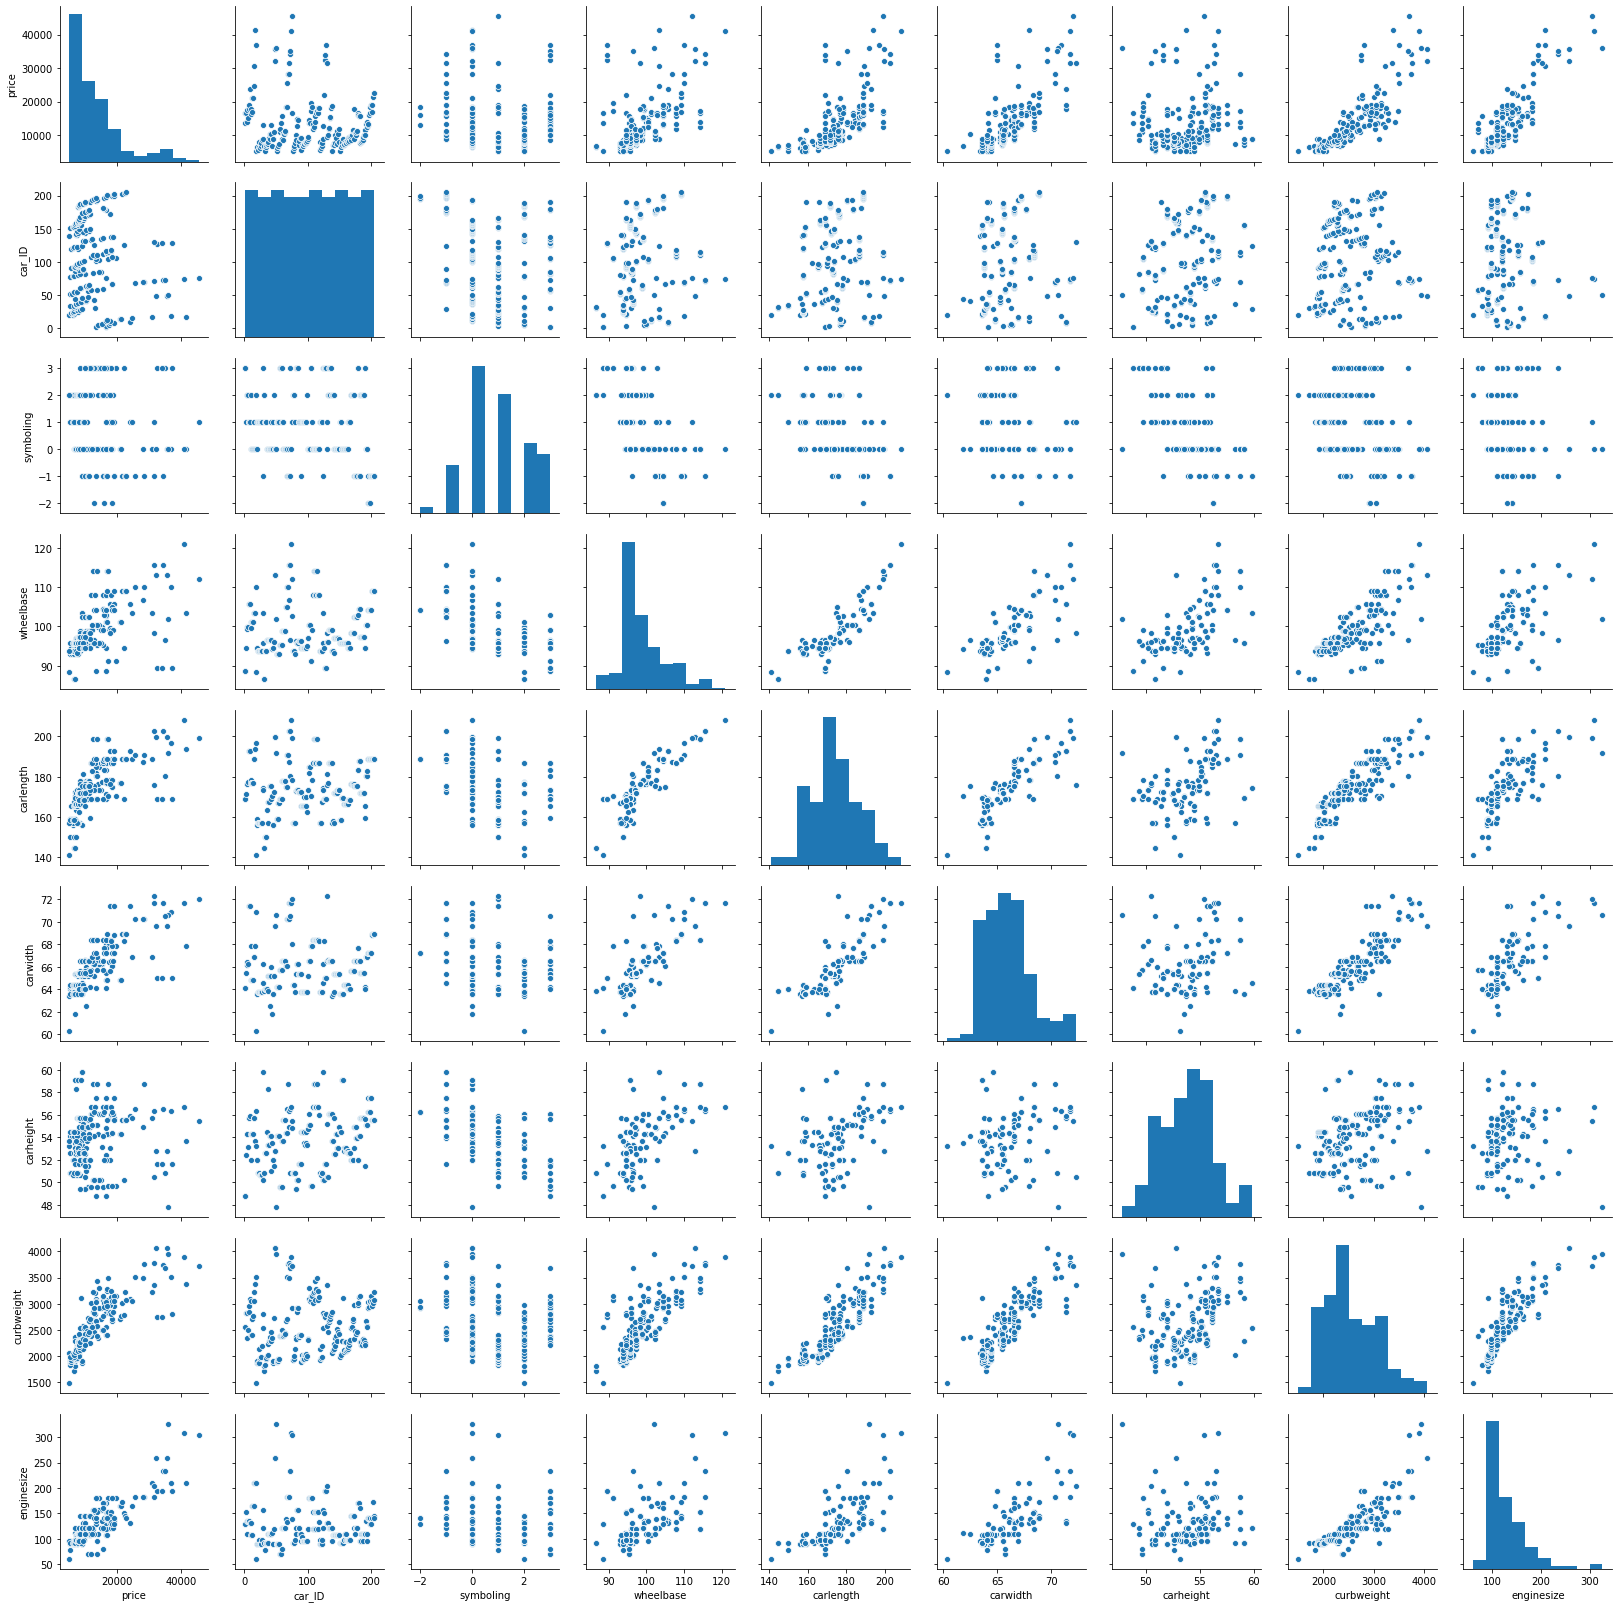

In [9]:
sns.pairplot(df[['price', 'car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize']])
plt.show()

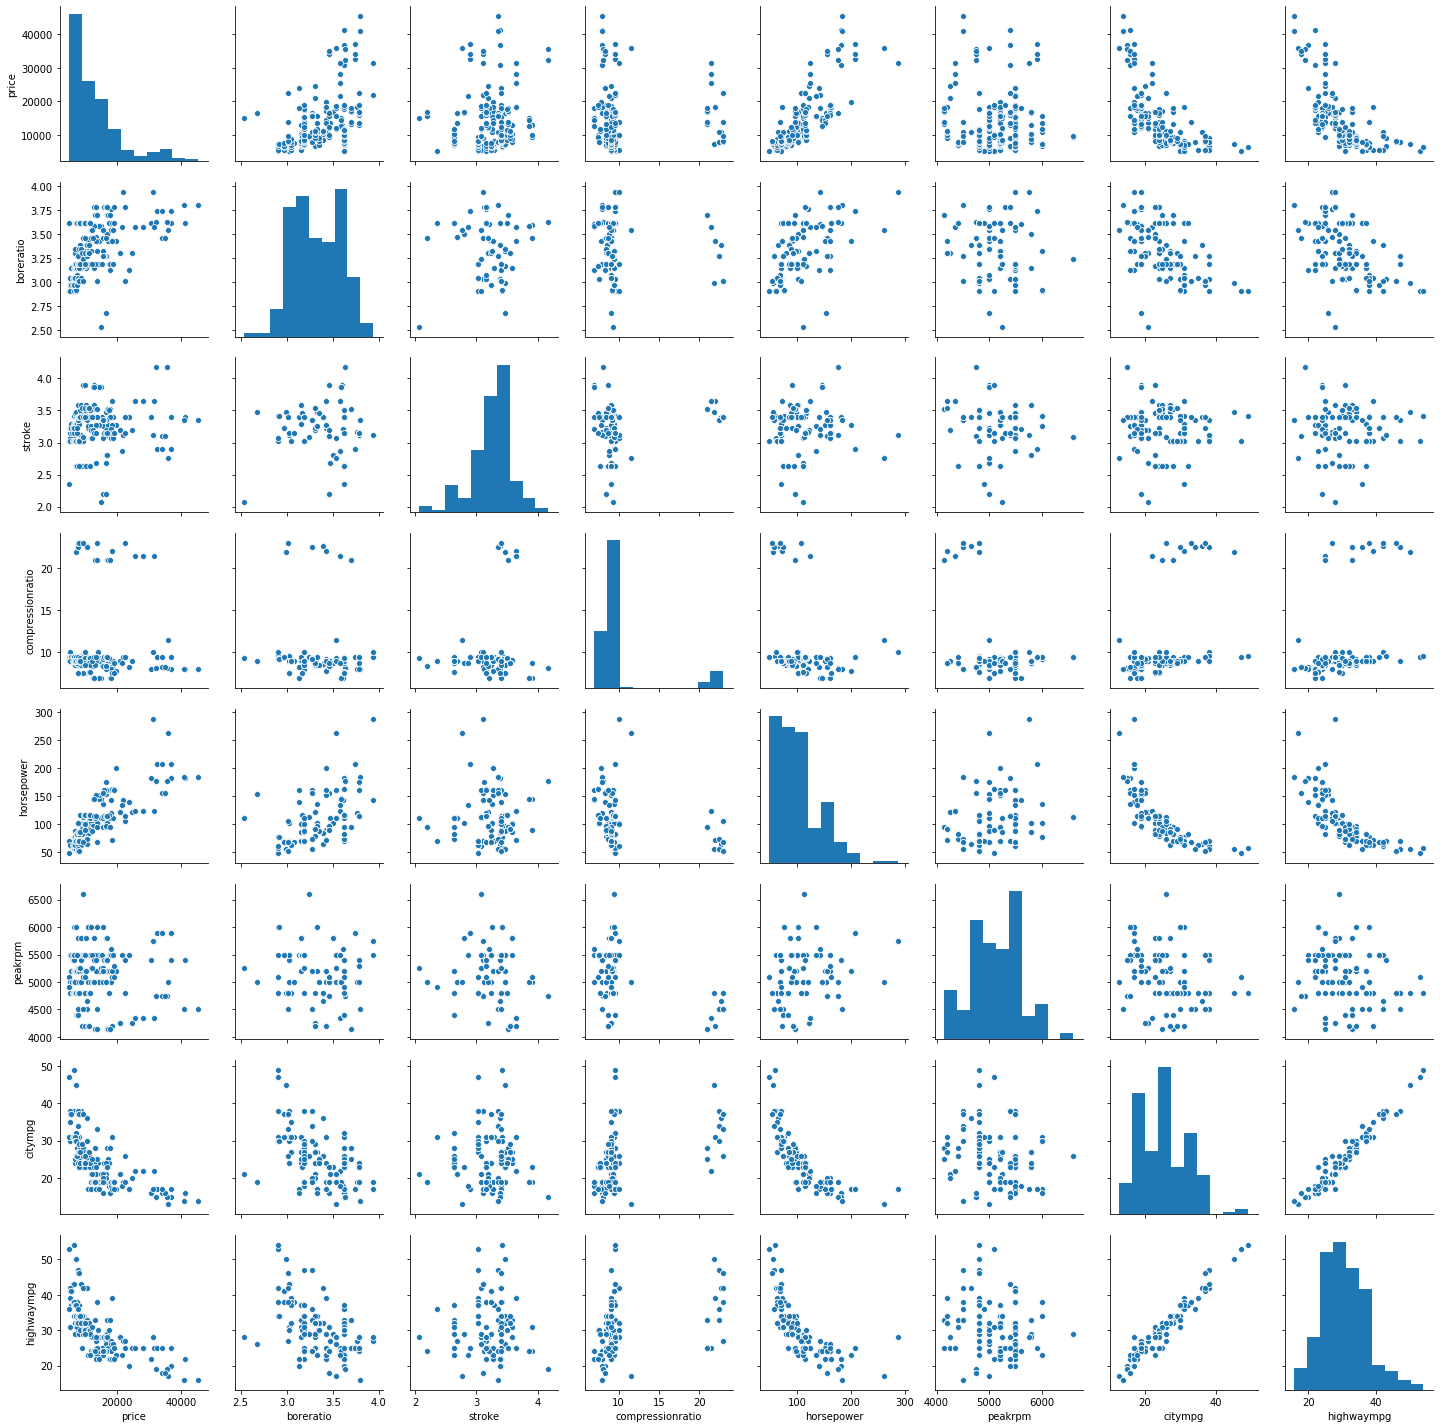

In [10]:
sns.pairplot(df[['price', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
plt.show()

In [11]:
for i in categorical:
    print(i, "--", df[i].nunique())

CarName -- 147
fueltype -- 2
aspiration -- 2
doornumber -- 2
carbody -- 5
drivewheel -- 3
enginelocation -- 2
enginetype -- 7
cylindernumber -- 7
fuelsystem -- 8


In [12]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(categories='auto')
# feature_arr = ohe.fit_transform(df[['fueltype','doornumber']]).toarray()
# feature_labels = ohe.categories_
# feature_labels

## Creating Car brand variable from CarName variable

In [13]:
df['car_brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])

In [14]:
df['car_brand'].nunique()

28

In [15]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [16]:
df.shape

(205, 27)

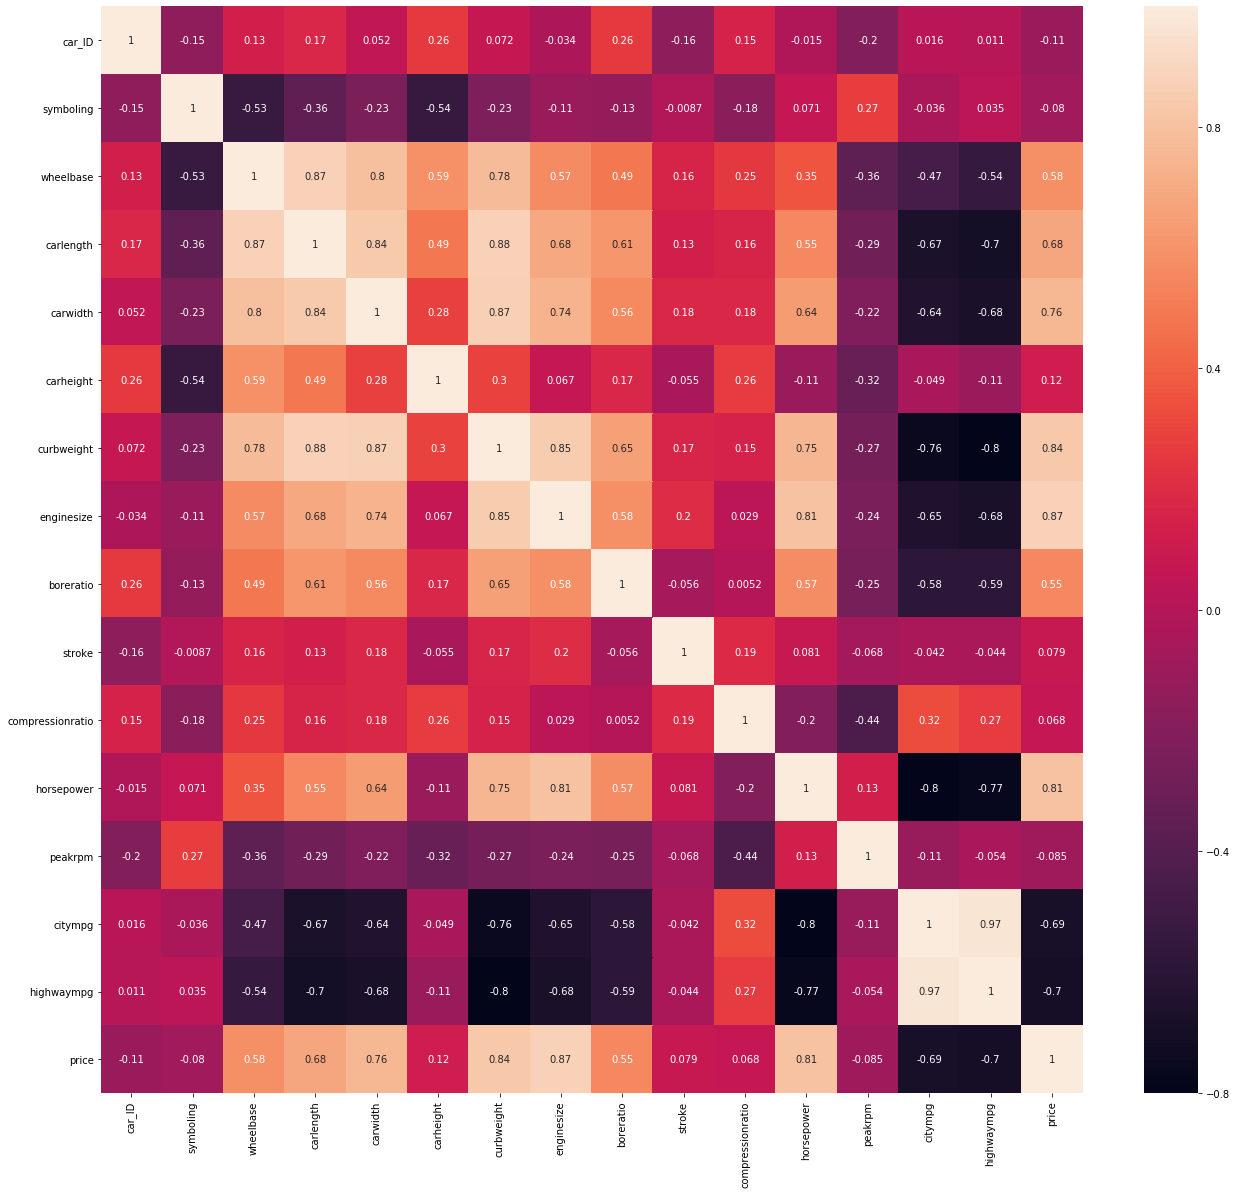

In [17]:
# Correlation coefficients to check which variables are highly correlated
plt.figure(figsize = (22, 20))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Top features that seems to be correlated with Price are:- 
1. Hosrsepower
2. Engineszie
3. Curbweight
4. Carwidth
5. Carlength
6. Wheelbase

In [18]:
categorical.append('car_brand')
categorical.remove('CarName')
categorical

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'car_brand']

In [19]:
for i in categorical:
    print(i, "--", df[i].nunique())

fueltype -- 2
aspiration -- 2
doornumber -- 2
carbody -- 5
drivewheel -- 3
enginelocation -- 2
enginetype -- 7
cylindernumber -- 7
fuelsystem -- 8
car_brand -- 28


In [20]:
for i in categorical:
    dum = pd.get_dummies(df[i], drop_first = True)
    df = pd.concat([df, dum], axis = 1)

In [21]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_brand,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(205, 83)

In [23]:
df2 = df =  df.drop(categorical, axis = 1)
df2 = df = df.drop(['car_ID', 'CarName'], axis=1)

In [24]:
df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df2.shape

(205, 71)

In [26]:
for i in continuous:
    if i != 'car_ID':
        print(i, " -- ", df2[i].nunique())

symboling  --  6
wheelbase  --  53
carlength  --  75
carwidth  --  44
carheight  --  49
curbweight  --  171
enginesize  --  44
boreratio  --  38
stroke  --  37
compressionratio  --  32
horsepower  --  59
peakrpm  --  23
citympg  --  29
highwaympg  --  30
price  --  189


## Rescaling the Features using MinMax scaling

In [27]:
continuous.remove('car_ID')
continuous.remove('price')

In [28]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df2[continuous] = mms.fit_transform(df2[continuous])

df2.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
0,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.6,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.8,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.8,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df2.shape

(205, 71)

## Splitting Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split
X = df2.drop(['price'], axis=1)
y = df2['price']

x_train, x_test, y_train, y_test = train_test_split(X,  y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [31]:
x_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,gas,turbo,two,hardtop,hatchback,sedan,wagon,fwd,rwd,rear,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,maxda,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porcshce,porsche,renault,saab,subaru,toyota,toyouta,vokswagen,volkswagen,volvo,vw
122,0.6,0.206997,0.391045,0.291667,0.250000,0.272692,0.139623,0.307143,0.552381,0.150000,0.083333,0.551020,0.500000,0.578947,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
125,1.0,0.230321,0.414925,0.666667,0.200000,0.500388,0.339623,1.000000,0.495238,0.156250,0.395833,0.551020,0.166667,0.289474,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
166,0.6,0.230321,0.411940,0.308333,0.400000,0.314973,0.139623,0.500000,0.480952,0.150000,0.266667,1.000000,0.361111,0.342105,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1.0,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.125000,0.262500,0.346939,0.222222,0.289474,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.2,0.516035,0.711940,0.575000,0.808333,0.647401,0.260377,0.771429,0.514286,0.031250,0.475000,0.387755,0.111111,0.157895,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
190,1.0,0.230321,0.367164,0.308333,0.300000,0.284329,0.181132,0.464286,0.633333,0.093750,0.175000,0.551020,0.305556,0.342105,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
96,0.6,0.230321,0.361194,0.291667,0.558333,0.187355,0.135849,0.435714,0.580952,0.150000,0.087500,0.428571,0.500000,0.552632,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
177,0.2,0.460641,0.514925,0.516667,0.508333,0.376261,0.230189,0.550000,0.700000,0.106250,0.183333,0.020408,0.388889,0.421053,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
181,0.2,0.521866,0.697015,0.516667,0.525000,0.645074,0.377358,0.521429,0.609524,0.137500,0.450000,0.428571,0.166667,0.210526,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
97,0.6,0.230321,0.434328,0.291667,0.475000,0.212956,0.135849,0.435714,0.580952,0.150000,0.087500,0.428571,0.500000,0.552632,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train

122     7609.0
125    22018.0
166     9538.0
1      16500.0
199    18950.0
190     9980.0
96      7499.0
177    11248.0
181    15750.0
97      7999.0
120     6229.0
117    18150.0
57     13645.0
44      8916.5
153     6918.0
85      6989.0
127    34028.0
151     6338.0
204    22625.0
10     16430.0
20      6575.0
170    11199.0
82     12629.0
12     20970.0
16     41315.0
178    16558.0
90      7099.0
89      5499.0
45      8916.5
161     8358.0
        ...   
129    31400.5
159     7788.0
132    11850.0
108    13200.0
155     8778.0
130     9295.0
86      8189.0
93      7349.0
137    18620.0
144     9233.0
58     15645.0
60      8495.0
107    11900.0
143     9960.0
203    22470.0
34      7129.0
14     24565.0
66     18344.0
53      6695.0
98      8249.0
180    15690.0
94      7299.0
138     5118.0
176    10898.0
79      7689.0
87      9279.0
103    13499.0
67     25552.0
24      6229.0
8      23875.0
Name: price, Length: 143, dtype: float64

# Model Building

### 1. Model building will all features

In [33]:
import statsmodels.api as sm

x_train = sm.add_constant(x_train)
lm1 = sm.OLS(y_train, x_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     51.79
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           3.00e-46
Time:                        23:43:17   Log-Likelihood:                -1220.3
No. Observations:                 143   AIC:                             2565.
Df Residuals:                      81   BIC:                             2748.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -679.6847   5332.117  

In [34]:
high_pvalue = ['symboling', 'citympg', 'fwd', 'ohc', '4bbl', 'idi', 'mpfi', 'spdi', 'alfa-romero', 'audi', 'buick', 
               'isuzu', 'maxda', 'mazda', 'nissan', 'renault', 'toyota', 'volkswagen', 'vw']

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,rotor,inf
15,gas,inf
58,peugeot,inf
39,idi,inf
36,two,inf
34,three,inf
28,ohcf,inf
26,l,inf
24,rear,inf
64,subaru,inf


In [37]:
x_test = sm.add_constant(x_test)
y_pred = lm1.predict(x_test)

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8171976727778489

In [39]:
# x_train = x_train[['horsepower', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'wheelbase']]
# lm2 = sm.OLS(y_train, x_train).fit()
# print(lm2.summary())

# x_test = x_test[['horsepower', 'enginesize', 'curbweight', 'carwidth', 'carlength', 'wheelbase']]
# y_pred = lm2.predict(x_test)
# r2_score(y_test, y_pred)

# Feature Selection using RFE because the volume of features is very high

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [41]:
lm2 = LinearRegression()
lm2.fit(x_train, y_train)

rfe = RFE(lm2, 10)             
rfe = rfe.fit(x_train, y_train)

In [42]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('const', False, 46),
 ('symboling', False, 44),
 ('wheelbase', False, 16),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 26),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 47),
 ('stroke', False, 4),
 ('compressionratio', False, 37),
 ('horsepower', True, 1),
 ('peakrpm', False, 11),
 ('citympg', False, 19),
 ('highwaympg', False, 42),
 ('gas', False, 35),
 ('turbo', False, 22),
 ('two', False, 51),
 ('hardtop', False, 50),
 ('hatchback', False, 34),
 ('sedan', False, 57),
 ('wagon', False, 56),
 ('fwd', False, 38),
 ('rwd', False, 41),
 ('rear', True, 1),
 ('dohcv', False, 3),
 ('l', False, 48),
 ('ohc', False, 9),
 ('ohcf', False, 7),
 ('ohcv', False, 54),
 ('rotor', False, 21),
 ('five', False, 8),
 ('four', False, 2),
 ('six', True, 1),
 ('three', False, 12),
 ('twelve', True, 1),
 ('two', False, 31),
 ('2bbl', False, 40),
 ('4bbl', False, 23),
 ('idi', False, 6),
 ('mfi', False, 58),
 ('mpfi', False, 30),
 ('spdi', False, 25),

In [43]:
col = x_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'rear', 'six', 'twelve', 'bmw', 'jaguar'],
      dtype='object')

### 2. Model building using features from RFE

In [44]:
x_train2 = x_train[col]
lm2 = sm.OLS(y_train, x_train2).fit()
print(lm2.summary())

x_test2 = x_test[col]
y_pred2 = lm2.predict(x_test2)
r2_score(y_test, y_pred2)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              550.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                   5.60e-103
Time:                        23:43:18   Log-Likelihood:                         -1312.0
No. Observations:                 143   AIC:                                      2644.
Df Residuals:                     133   BIC:                                      2674.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8755752570376194

In [45]:
vif = pd.DataFrame()
vif['Features'] = x_train2.columns
vif['VIF'] = [variance_inflation_factor(x_train2.values, i) for i in range(x_train2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,52.29
1,carwidth,44.10
0,carlength,39.79
3,enginesize,30.45
4,horsepower,11.96
6,six,2.79
9,jaguar,2.14
7,twelve,2.03
8,bmw,1.43
5,rear,1.22


In [46]:
high_pvalue

['symboling',
 'citympg',
 'fwd',
 'ohc',
 '4bbl',
 'idi',
 'mpfi',
 'spdi',
 'alfa-romero',
 'audi',
 'buick',
 'isuzu',
 'maxda',
 'mazda',
 'nissan',
 'renault',
 'toyota',
 'volkswagen',
 'vw']

### 3. Adding Wheelbase because it's a relevant business variable and also had high correlation value with price

In [47]:
col = list(col)
col.append('wheelbase')

x_train3 = x_train[col]
lm3 = sm.OLS(y_train, x_train3).fit()
print(lm3.summary())

x_test3 = x_test[col]
y_pred3 = lm3.predict(x_test3)
r2_score(y_test, y_pred3)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              496.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                   1.27e-101
Time:                        23:43:18   Log-Likelihood:                         -1311.9
No. Observations:                 143   AIC:                                      2646.
Df Residuals:                     132   BIC:                                      2678.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8726115909040533

In [48]:
vif = pd.DataFrame()
vif['Features'] = x_train3.columns
vif['VIF'] = [variance_inflation_factor(x_train3.values, i) for i in range(x_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,59.35
1,carwidth,52.00
0,carlength,46.85
10,wheelbase,34.20
3,enginesize,31.28
4,horsepower,15.77
6,six,2.88
9,jaguar,2.23
7,twelve,2.03
8,bmw,1.46


### 4. Removing Curbweight because of high VIF value

In [49]:
col.remove('curbweight')
x_train4 = x_train[col]
lm4 = sm.OLS(y_train, x_train4).fit()
print(lm4.summary())

x_test4 = x_test[col]
y_pred4 = lm4.predict(x_test4)
r2_score(y_test, y_pred4)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              462.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    3.96e-98
Time:                        23:43:18   Log-Likelihood:                         -1324.0
No. Observations:                 143   AIC:                                      2668.
Df Residuals:                     133   BIC:                                      2698.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8937930774351135

In [50]:
vif = pd.DataFrame()
vif['Features'] = x_test4.columns
vif['VIF'] = [variance_inflation_factor(x_test4.values, i) for i in range(x_test4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,50.03
1,carwidth,36.21
9,wheelbase,32.12
2,enginesize,15.24
3,horsepower,13.83
5,six,2.83
4,rear,2.09
7,bmw,1.35
6,twelve,NaN
8,jaguar,NaN


### 5. Removing Twelve and Jaguar because of NAN VIF which means it hardly creates an impact

In [51]:
col.remove('twelve')
col.remove('jaguar')

x_train5 = x_train[col]
lm5 = sm.OLS(y_train, x_train5).fit()
print(lm5.summary())

x_test5 = x_test[col]
y_pred5 = lm5.predict(x_test5)
r2_score(y_test, y_pred5)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              545.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    8.09e-99
Time:                        23:43:18   Log-Likelihood:                         -1329.1
No. Observations:                 143   AIC:                                      2674.
Df Residuals:                     135   BIC:                                      2698.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8960495051044723

In [52]:
vif = pd.DataFrame()
vif['Features'] = x_test5.columns
vif['VIF'] = [variance_inflation_factor(x_test5.values, i) for i in range(x_test5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,50.03
1,carwidth,36.21
7,wheelbase,32.12
2,enginesize,15.24
3,horsepower,13.83
5,six,2.83
4,rear,2.09
6,bmw,1.35


### 6. Checking the new R-squared by removing carlength and wheelbase and it's impact

In [53]:
col.remove('carlength')

x_train6 = x_train[col]
lm6 = sm.OLS(y_train, x_train6).fit()
print(lm6.summary())

x_test6 = x_test[col]
y_pred6 = lm6.predict(x_test6)
r2_score(y_test, y_pred6)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              606.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    3.17e-99
Time:                        23:43:18   Log-Likelihood:                         -1331.6
No. Observations:                 143   AIC:                                      2677.
Df Residuals:                     136   BIC:                                      2698.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8893577502521468

In [54]:
vif = pd.DataFrame()
vif['Features'] = x_test6.columns
vif['VIF'] = [variance_inflation_factor(x_test6.values, i) for i in range(x_test6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,25.20
6,wheelbase,20.40
1,enginesize,14.56
2,horsepower,12.47
4,six,2.82
3,rear,2.08
5,bmw,1.34


In [55]:
col.append('carlength')
col.remove('wheelbase')

x_train7 = x_train[col]
lm7 = sm.OLS(y_train, x_train7).fit()
print(lm7.summary())

x_test7 = x_test[col]
y_pred7 = lm7.predict(x_test7)
r2_score(y_test, y_pred7)

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              610.7
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                    2.03e-99
Time:                        23:43:18   Log-Likelihood:                         -1331.1
No. Observations:                 143   AIC:                                      2676.
Df Residuals:                     136   BIC:                                      2697.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

0.8896944369023063

In [56]:
vif = pd.DataFrame()
vif['Features'] = x_test7.columns
vif['VIF'] = [variance_inflation_factor(x_test7.values, i) for i in range(x_test7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,34.97
6,carlength,31.77
1,enginesize,13.42
2,horsepower,12.66
4,six,2.55
3,rear,2.07
5,bmw,1.31


# Finally choosing Model 5 and it's features for final prediction model
### Feature List:
1. carlength
2. carwidth
3. wheelbase
4. enginesize
5. horsepower
6. six
7. rear
8. bmw

In [57]:
print(len(y_test))
print(len(y_pred5))

62
62


Text(0, 0.5, 'Price')

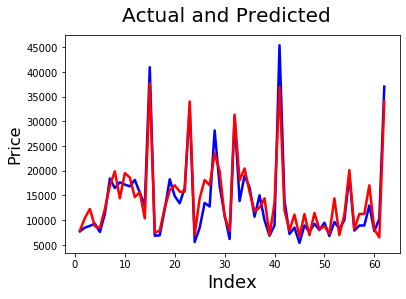

In [58]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred5, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price - Predicted Price')

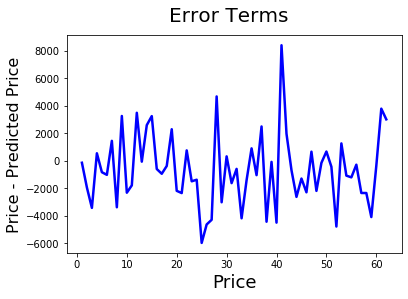

In [59]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_test-y_pred5, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20) 
plt.xlabel('Price', fontsize=18)
plt.ylabel('Price - Predicted Price', fontsize=16)

Text(0, 0.5, 'Price')

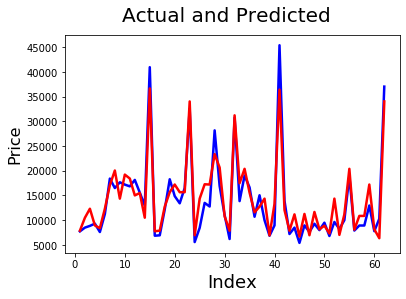

In [60]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred4, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Price', fontsize=16)

Text(0, 0.5, 'Price')

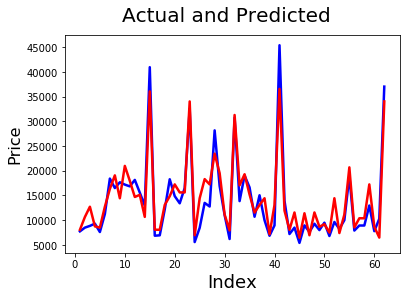

In [61]:
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred7, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Price', fontsize=16)